In [28]:
l=[]
tt=[]
ee=[]
te=[]
pp=[]
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
import matplotlib
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [6.0,6.0]
matplotlib.rcParams['figure.dpi'] = 300
#matplotlib.use('pdf')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)

l=[]
tt=[]
ee=[]
te=[]
pp=[]
tt_array=np.zeros((3,3399))
ee_array=np.zeros((3,3399))
te_array=np.zeros((3,3399))
pp_array=np.zeros((3,3499))


h=open('test_lensedCls.dat')
for line in h:
    l.append(float(line.split()[0]))
    tt.append(float(line.split()[1]))
    ee.append(float(line.split()[2]))
    te.append(float(line.split()[3]))
#    pp.append(float(line.split()[4]))
h=open('test_lenspotentialCls.dat')
for line in h:
    pp.append(float(line.split()[5]))  
tt_array[0,:]=np.array(tt)
ee_array[0,:]=np.array(ee)
te_array[0,:]=np.array(te)
pp_array[0,:]=np.array(pp)

lpp=[]
l=[]
tt=[]
ee=[]
te=[]
pp=[]
i=open('bestfit_densfix_lensedCls.dat')
for line in i:
    l.append(float(line.split()[0]))
    tt.append(float(line.split()[1]))
    ee.append(float(line.split()[2]))
    te.append(float(line.split()[3]))
i=open('bestfit_densfix_lenspotentialCls.dat')
for line in i:
    lpp.append(float(line.split()[0]))  
    pp.append(float(line.split()[5]))  
tt_array[1,:]=np.array(tt)
ee_array[1,:]=np.array(ee)
te_array[1,:]=np.array(te)
pp_array[1,:]=np.array(pp)

llens=np.array(lpp)
l=[]
tt=[]
ee=[]
te=[]
pp=[]
i=open('bestfit_nodensfix_lensedCls.dat')
for line in i:
    l.append(float(line.split()[0]))
    tt.append(float(line.split()[1]))
    ee.append(float(line.split()[2]))
    te.append(float(line.split()[3]))
#    pp.append(float(line.split()[4]))
i=open('bestfit_nodensfix_lenspotentialCls.dat')
for line in i:
    pp.append(float(line.split()[5]))  

tt_array[2,:]=np.array(tt)
ee_array[2,:]=np.array(ee)
te_array[2,:]=np.array(te)
pp_array[2,:]=np.array(pp)



In [99]:
th_fwhm=7.1
nlev=50
f_sky=0.65
from covar_routines import get_inv_covar_tonly
fe_tt=[]
fe_ee=[]
for i in range(np.size(l)):
    u=np.sqrt(1./get_inv_covar_tonly(l[i],tt_array[0,i],f_sky,nlev,th_fwhm))
    fe_tt.append(u/tt_array[0,i])
    u=np.sqrt(1./get_inv_covar_tonly(l[i],ee_array[0,i],f_sky,nlev*np.sqrt(2),th_fwhm))
    fe_ee.append(u/ee_array[0,i])



In [100]:
import matplotlib.pyplot as plt


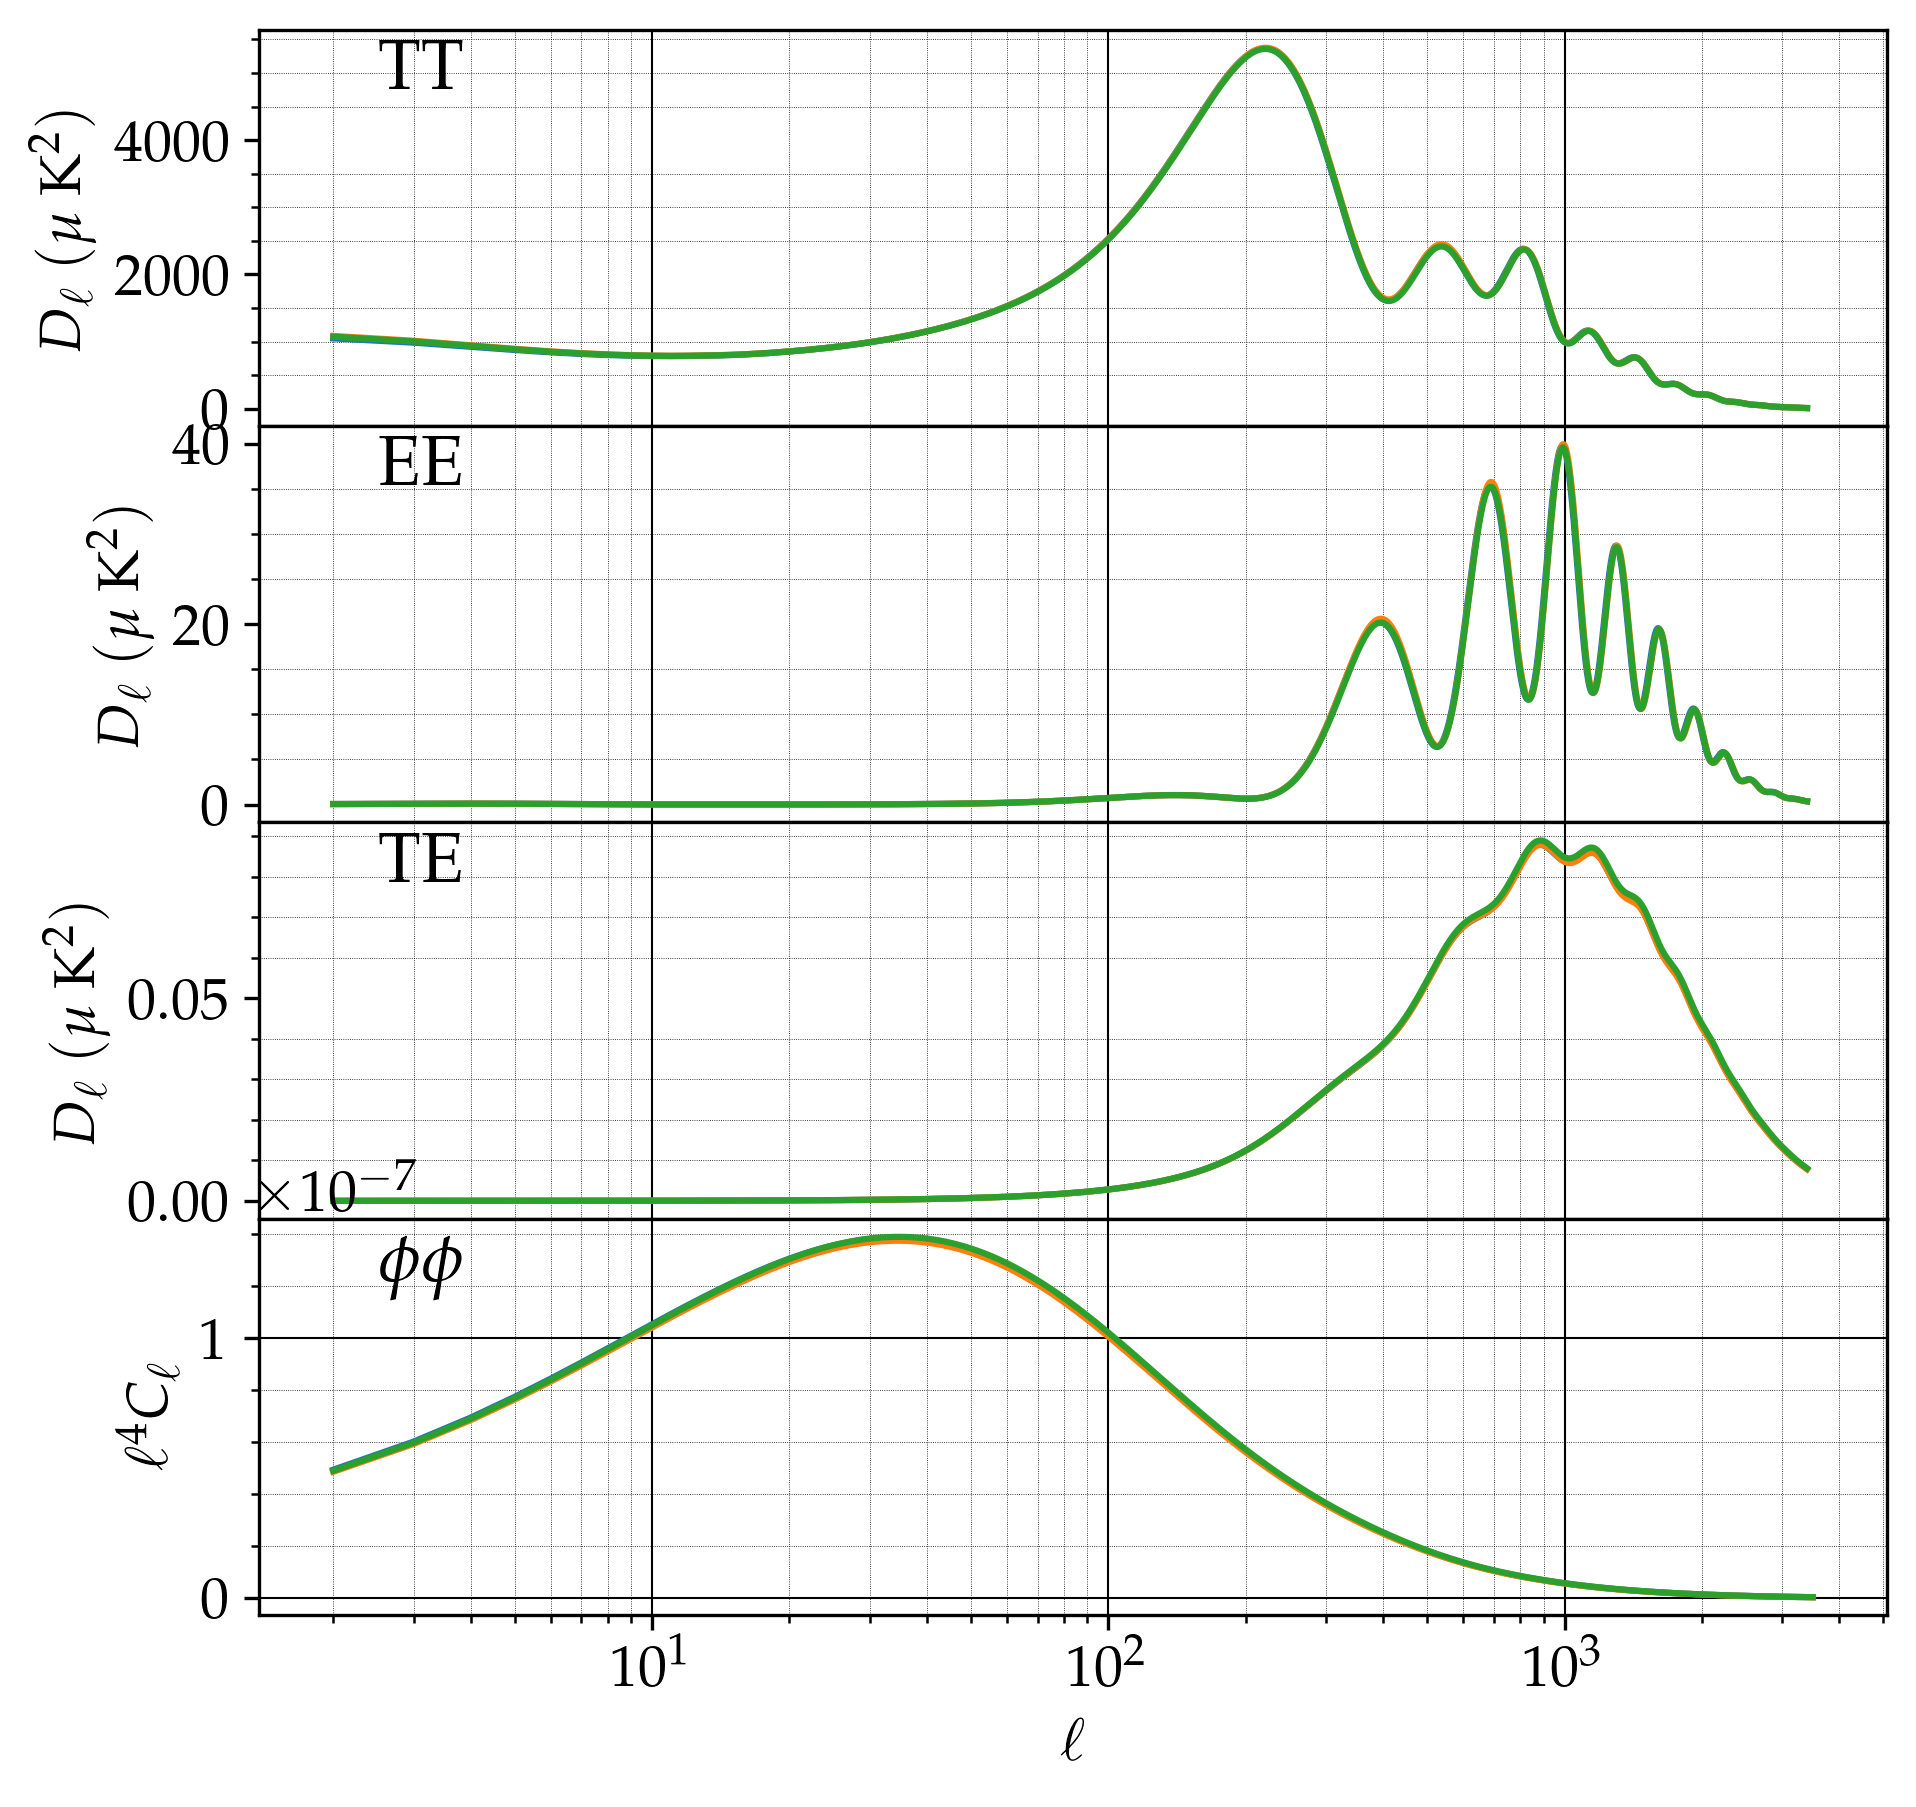

In [101]:
fig, axs = plt.subplots(4, sharex=True, sharey=False)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = [7,7]

axislabelfontsize='large'
plt.subplots_adjust(hspace=0.)

for ax in axs:
    ax.label_outer()
    
for j in range(3):  
    axs[0].plot(l,tt_array[j,:])
    axs[1].plot(l,ee_array[j,:])
    axs[2].plot(l,te_array[j,:])
    axs[3].plot(lpp,pp_array[j,:])

axs[0].set_xscale('log')
axs[0].set_yscale('linear')
axs[1].set_yscale('linear')
axs[2].set_yscale('linear')

axs[0].minorticks_on()
axs[1].minorticks_on()
axs[2].minorticks_on()
axs[3].minorticks_on()
#axs[3].set_yscale('log')

# # # Customize the major grid
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[2].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[3].grid(which='major', linestyle='-', linewidth='0.5', color='black')


plt.setp(axs[0].get_xticklabels(), visible=True)

axs[0].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[2].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[3].grid(which='minor', linestyle=':', linewidth='0.2', color='black')

axs[3].set_xlabel(r'$\ell$')
axs[0].set_ylabel(r'$D_{\ell}~{(\mu~{\rm K}^{2})}$')
axs[1].set_ylabel(r'$D_{\ell}~{(\mu~{\rm K}^{2})}$')
axs[2].set_ylabel(r'$D_{\ell}~{(\mu~{\rm K}^{2})}$')
axs[3].set_ylabel(r'$\ell^{4}C_{\ell}$')

axs[0].yaxis.grid(False)
axs[1].yaxis.grid(False)
axs[2].yaxis.grid(False)
# axs[3].yaxis.grid(False)
axs[0].set_title(r'${\rm TT}$',y=1.0, pad=-14,x=0.1)
axs[1].set_title(r'${\rm EE}$',y=1.0, pad=-14,x=0.1)
axs[2].set_title(r'${\rm TE}$',y=1.0, pad=-14,x=0.1)
axs[3].set_title(r'${\phi\phi}$',y=0.99, pad=-14,x=0.1)
plt.show()

In [102]:
ttres=np.zeros((2,3399))
eeres=np.zeros((2,3399))
teres=np.zeros((2,3399))
ppres=np.zeros((2,3499))

for k in range(0,2):
    ttres[k,:]=((tt_array[k+1,:]-tt_array[0,:])/tt_array[0,:])
    eeres[k,:]=((ee_array[k+1,:]-ee_array[0,:])/ee_array[0,:])
    teres[k,:]=((te_array[k+1,:]-te_array[0,:])/te_array[0,:])
    ppres[k,:]=((pp_array[k+1,:]-pp_array[0,:])/pp_array[0,:])
benchmark_primary=1/np.sqrt(2*np.array(l)+1)
noise_primary=fe

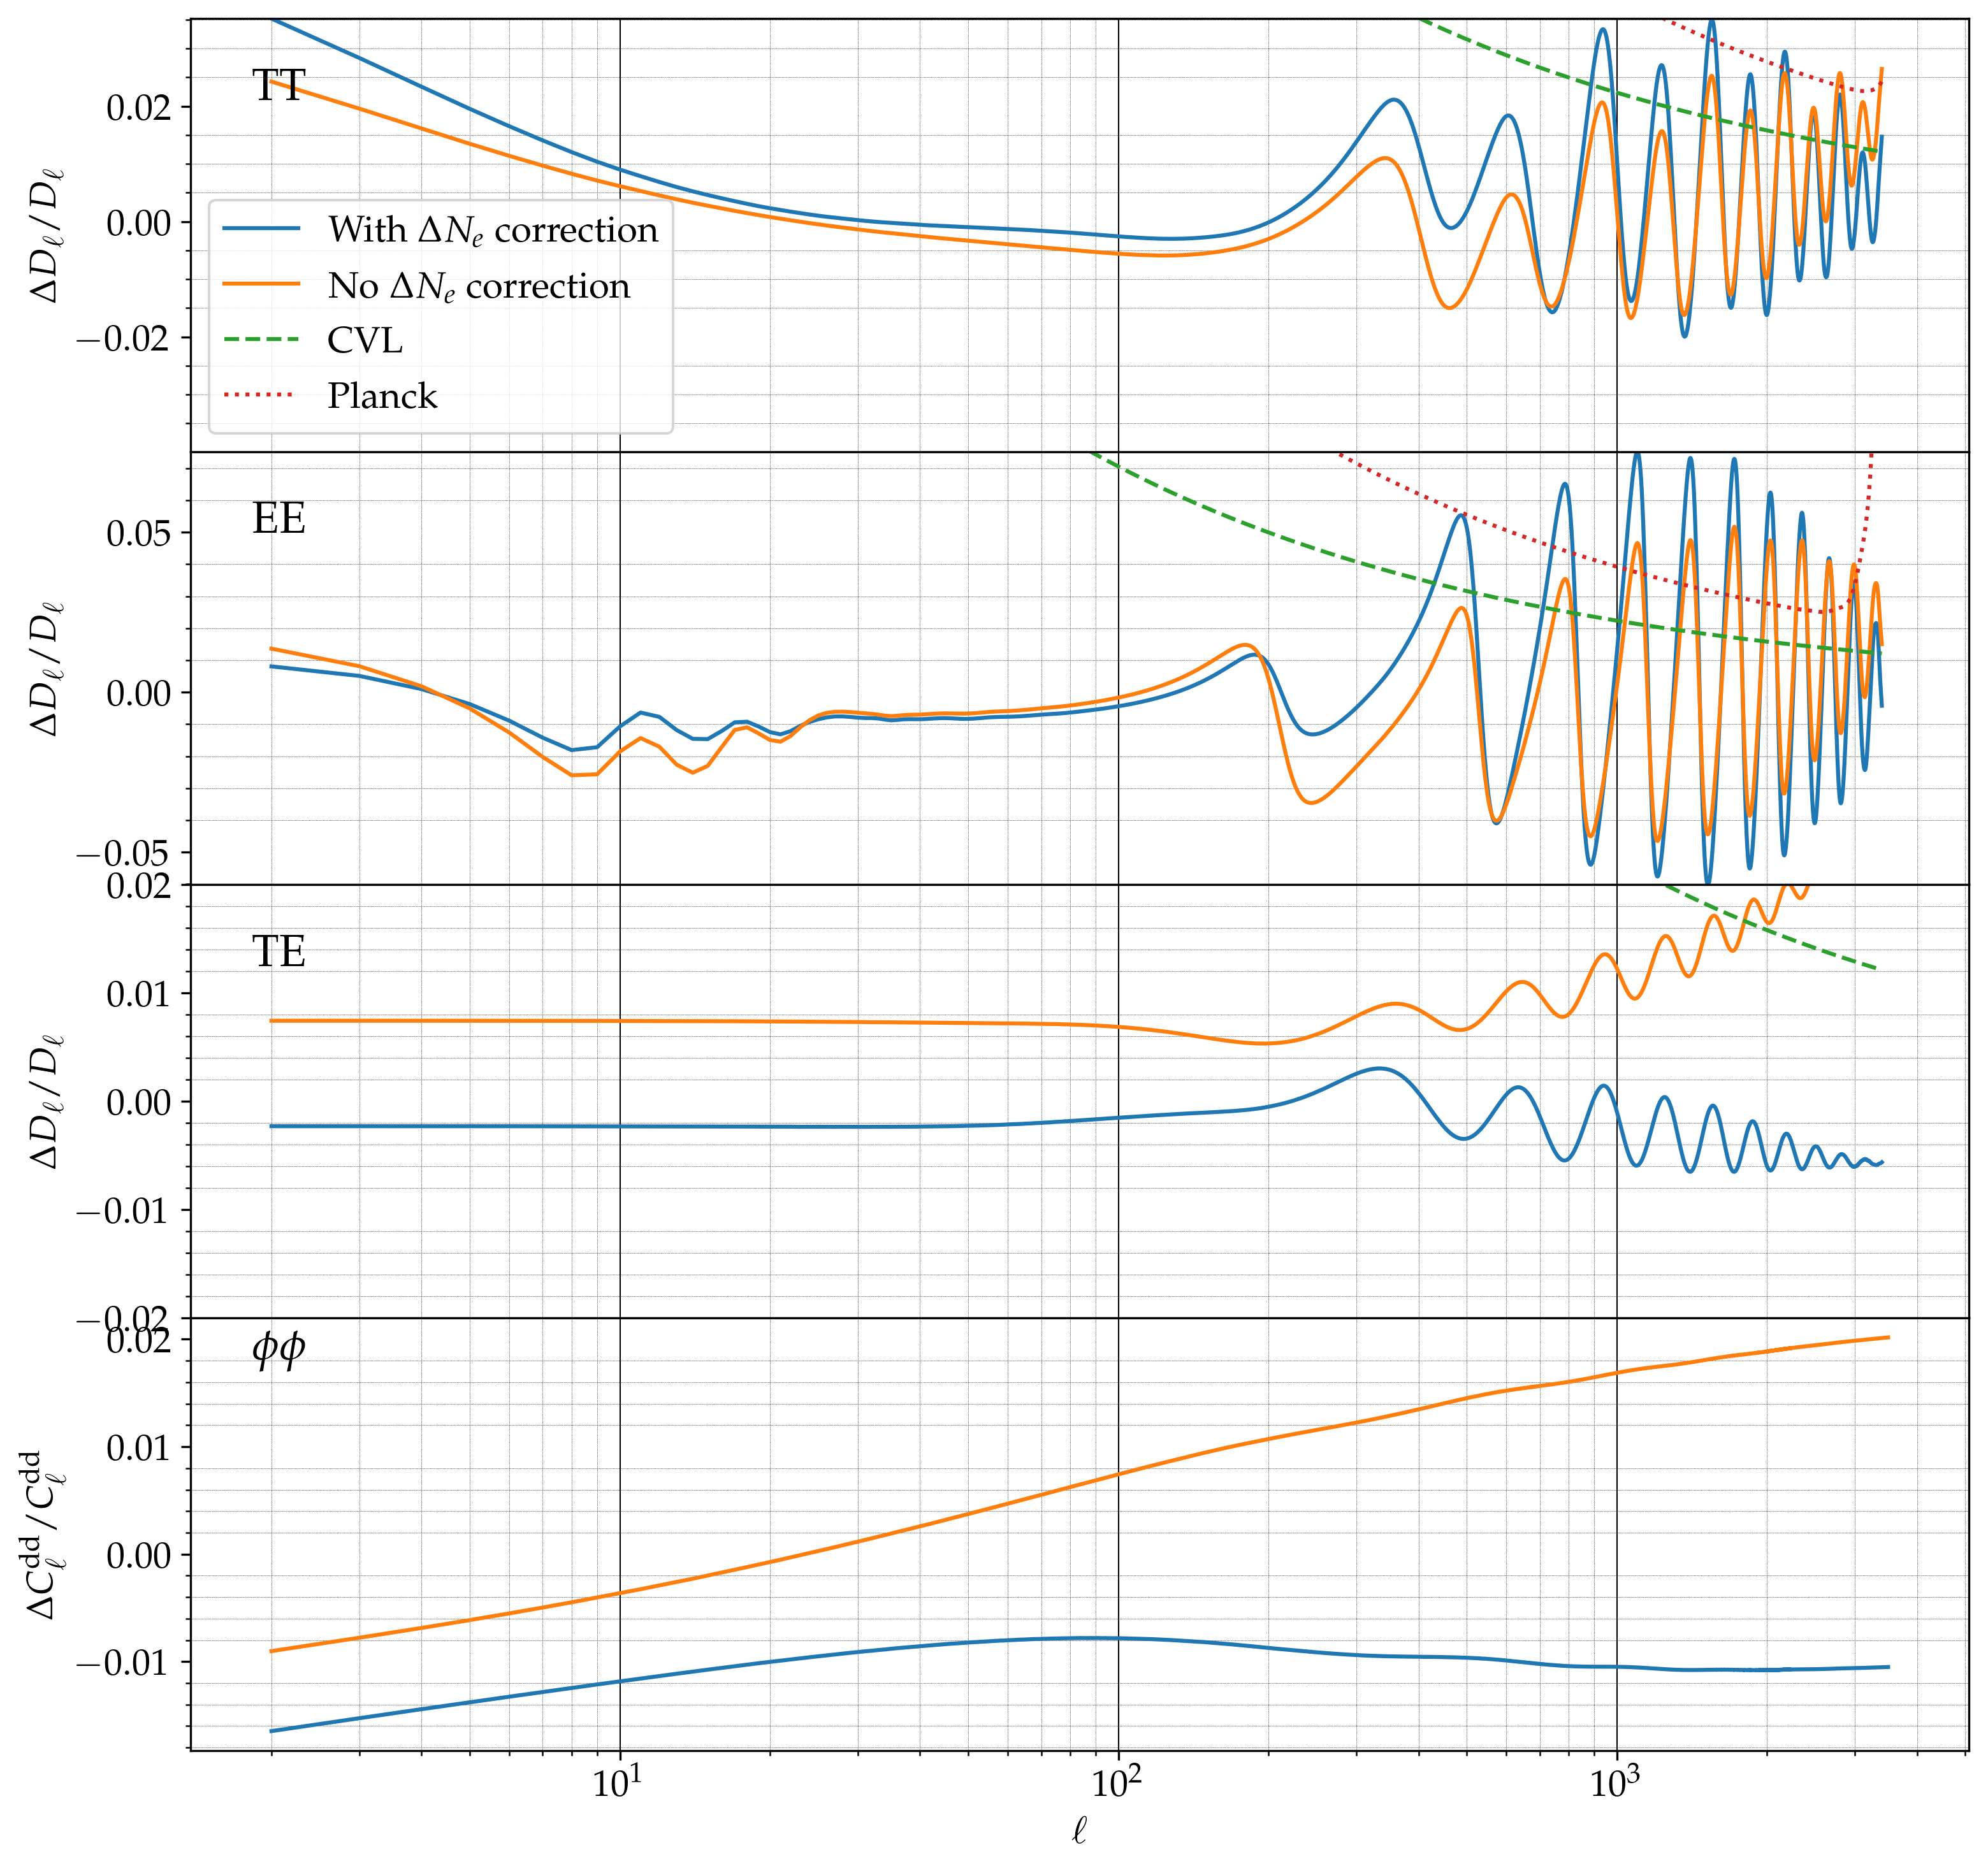

In [151]:
plt.close()
fig, axs = plt.subplots(4, sharex=True, sharey=False)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = [12,12]

axislabelfontsize='large'
plt.subplots_adjust(hspace=0.)

for ax in axs:
    ax.label_outer()
   

axs[0].set_ylim([2*min(ttres[0,:]),max(ttres[0,:])])
axs[1].set_ylim([min(eeres[0,:]),max(eeres[0,:])])
axs[2].set_ylim([-0.02,0.02])

for j in range(2):          
    axs[1].plot(l,eeres[j,:])
    axs[2].plot(l,teres[j,:])
    axs[3].plot(lpp,ppres[j,:])


axs[0].plot(l,ttres[0,:],label='With'+r'$~\Delta N_{e}~{\rm correction}$')
axs[0].plot(l,ttres[1,:],label='No'+r'$~\Delta N_{e}~{\rm correction}$')

axs[0].plot(l,benchmark_primary,linestyle='--',label='CVL')
axs[1].plot(l,benchmark_primary,linestyle='--')
axs[2].plot(l,benchmark_primary,linestyle='--')    
axs[0].plot(l,fe,linestyle=':',label='Planck')
axs[1].plot(l,fe_ee,linestyle=':')



axs[0].legend(loc=0,prop={'size': 14})
axs[0].set_xscale('log')
axs[0].set_yscale('linear')
axs[1].set_yscale('linear')
axs[2].set_yscale('linear')

axs[0].minorticks_on()
axs[1].minorticks_on()
axs[2].minorticks_on()
axs[3].minorticks_on()
#axs[3].set_yscale('log')

# # # Customize the major grid
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[2].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[3].grid(which='major', linestyle='-', linewidth='0.5', color='black')


plt.setp(axs[0].get_xticklabels(), visible=True)

axs[0].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[2].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[3].grid(which='minor', linestyle=':', linewidth='0.2', color='black')

axs[3].set_xlabel(r'$\ell$')
axs[0].set_ylabel(r'$\Delta D_{\ell}/D_{\ell}$')
axs[1].set_ylabel(r'$\Delta D_{\ell}/D_{\ell}$')
axs[2].set_ylabel(r'$\Delta D_{\ell}/D_{\ell}$')
axs[3].set_ylabel(r'$\Delta C_{\ell}^{\rm dd}/C_{\ell}^{\rm dd}$')

axs[0].yaxis.grid(False)
axs[1].yaxis.grid(False)
axs[2].yaxis.grid(False)
axs[3].yaxis.grid(False)
axs[0].set_title(r'${\rm TT}$',y=0.9, pad=-14,x=0.05)
axs[1].set_title(r'${\rm EE}$',y=0.9, pad=-14,x=0.05)
axs[2].set_title(r'${\rm TE}$',y=0.9, pad=-14,x=0.05)
axs[3].set_title(r'${\phi\phi}$',y=0.99, pad=-14,x=0.05)

plt.show()
plt.close()

In [52]:
print(ttres[1,:])

[0.03519615 0.02838042 0.02338646 ... 0.01443638 0.01457788 0.01472126]


In [45]:
print(eeres)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00806241  0.00509323  0.00097903 ... -0.00354562 -0.00388702
  -0.00423523]]


In [47]:
ttres

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03519615, 0.02838042, 0.02338646, ..., 0.01443638, 0.01457788,
        0.01472126]])

In [82]:
ttres=np.zeros((1,3399))
eeres=np.zeros((1,3399))
teres=np.zeros((1,3399))
ppres=np.zeros((1,3499))

for k in range(0,1):
    ttres[k,:]=((tt_array[k+2,:]-tt_array[k+1,:])/tt_array[0,:])
    eeres[k,:]=((ee_array[k+2,:]-ee_array[k+1,:])/ee_array[0,:])
    teres[k,:]=((te_array[k+2,:]-te_array[k+1,:])/te_array[0,:])
    ppres[k,:]=((pp_array[k+2,:]-pp_array[k+1,:])/pp_array[0,:])
benchmark_primary=1/np.sqrt(2*np.array(l)+1)

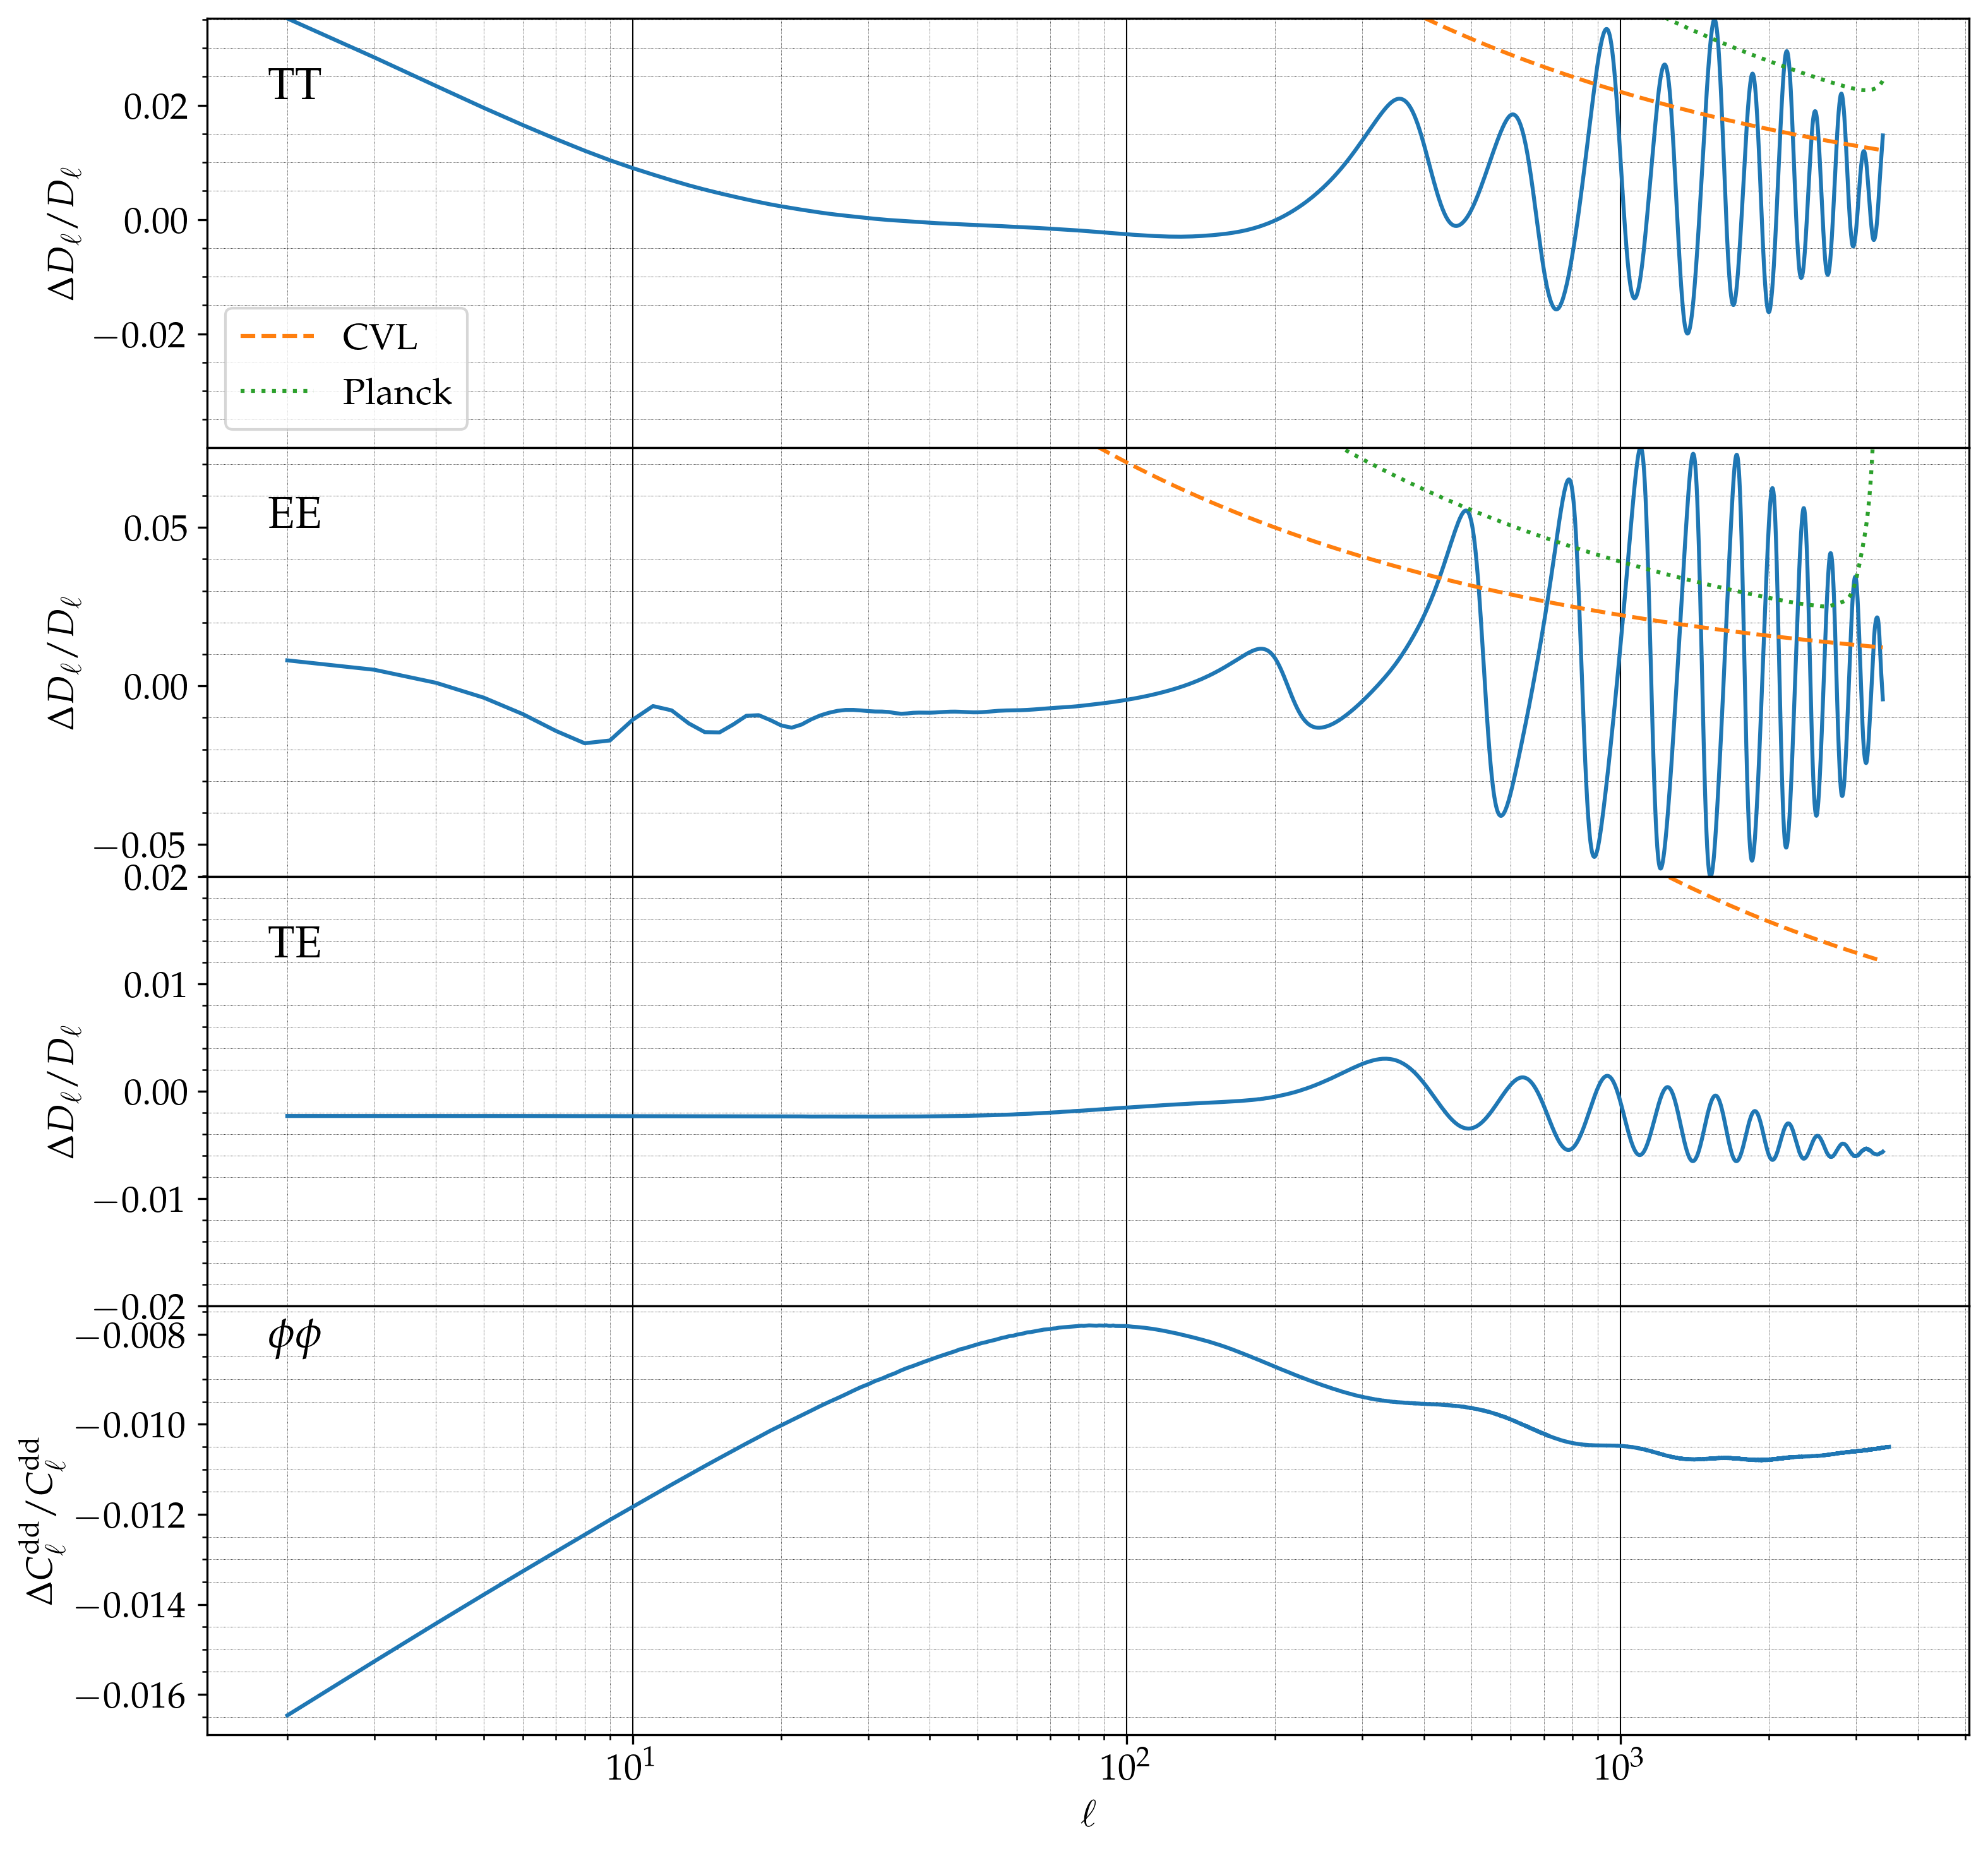

In [154]:
plt.close()
fig, axs = plt.subplots(4, sharex=True, sharey=False)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = [12,12]

axislabelfontsize='large'
plt.subplots_adjust(hspace=0.)

for ax in axs:
    ax.label_outer()
   

axs[0].set_ylim([2*min(ttres[0,:]),max(ttres[0,:])])
axs[1].set_ylim([min(eeres[0,:]),max(eeres[0,:])])
axs[2].set_ylim([-0.02,0.02])

axs[1].plot(l,eeres[0,:])
axs[2].plot(l,teres[0,:])
axs[3].plot(lpp,ppres[0,:])


axs[0].plot(l,ttres[0,:])

axs[0].plot(l,benchmark_primary,linestyle='--',label='CVL')
axs[1].plot(l,benchmark_primary,linestyle='--')
axs[2].plot(l,benchmark_primary,linestyle='--')    
axs[0].plot(l,fe,linestyle=':',label='Planck')
axs[1].plot(l,fe_ee,linestyle=':')



axs[0].legend(loc=0,prop={'size': 14})
axs[0].set_xscale('log')
axs[0].set_yscale('linear')
axs[1].set_yscale('linear')
axs[2].set_yscale('linear')

axs[0].minorticks_on()
axs[1].minorticks_on()
axs[2].minorticks_on()
axs[3].minorticks_on()
#axs[3].set_yscale('log')

# # # Customize the major grid
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[2].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[3].grid(which='major', linestyle='-', linewidth='0.5', color='black')


plt.setp(axs[0].get_xticklabels(), visible=True)

axs[0].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[2].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs[3].grid(which='minor', linestyle=':', linewidth='0.2', color='black')

axs[3].set_xlabel(r'$\ell$')
axs[0].set_ylabel(r'$\Delta D_{\ell}/D_{\ell}$')
axs[1].set_ylabel(r'$\Delta D_{\ell}/D_{\ell}$')
axs[2].set_ylabel(r'$\Delta D_{\ell}/D_{\ell}$')
axs[3].set_ylabel(r'$\Delta C_{\ell}^{\rm dd}/C_{\ell}^{\rm dd}$')

axs[0].yaxis.grid(False)
axs[1].yaxis.grid(False)
axs[2].yaxis.grid(False)
axs[3].yaxis.grid(False)
axs[0].set_title(r'${\rm TT}$',y=0.9, pad=-14,x=0.05)
axs[1].set_title(r'${\rm EE}$',y=0.9, pad=-14,x=0.05)
axs[2].set_title(r'${\rm TE}$',y=0.9, pad=-14,x=0.05)
axs[3].set_title(r'${\phi\phi}$',y=0.99, pad=-14,x=0.05)

plt.show()
plt.close()

In [81]:
teres

array([[0., 0., 0., ..., 0., 0., 0.]])